# Naive Bayes

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load direct and inverted indices
import sys
if '..' not in sys.path:
    sys.path.append('..')
from src.utils import LoadIndices, LoadDatasets

In [51]:
# Load datasets
an_jokes, bash_jokes = LoadDatasets()

# Load direct and inverted indices
an_direct, an_inverted, bash_direct, bash_inverted = LoadIndices()

In [52]:
# Vocablary size (number of different words). It will be used for Laplacian smoothing. Calculated for training set
def Vocablary(direct_index, train_good_idx, train_bad_idx):
    vocablary = set()
    for i in np.append(train_good_idx, train_bad_idx):
        vocablary |= set(direct_index[i])
        vocablary |= set(direct_index[i])
    return vocablary

In [53]:
# Random choice of indices for train and test part
def TrainTestIdx(jokes, train_share = 0.75):
    N = len(jokes)
    good_idx = np.array([i for i in range(N) if jokes[i][-1]])
    bad_idx = np.array([i for i in range(N) if not jokes[i][-1]])
    np.random.shuffle(good_idx)
    np.random.shuffle(bad_idx)
    N_good = len(good_idx)
    N_bad = len(bad_idx)
    N_train_good = int(train_share * N_good)
    N_train_bad = int(train_share * N_bad)
    N_test_good = N_good - N_train_good
    N_test_good = N_bad - N_train_good
    train_good_idx = good_idx[:N_train_good]
    test_good_idx = good_idx[N_train_good:]
    train_bad_idx = bad_idx[:N_train_bad]
    test_bad_idx = bad_idx[N_train_bad:]
    return train_good_idx, train_bad_idx, test_good_idx, test_bad_idx

In [39]:
# Positive and negative word frequencies (number of use in good or bad jokes)
def word_freq(direct_index, idx):
    wf = {}
    N = 0  # Total number of words in jokes of given type (type depends on what idx is passed)
    for i in idx:
        joke = direct_index[i]
        for word in joke:
            #wf[word] = wf.get(word, 0) + joke[word]
            #N += joke[word]
            wf[word] = wf.get(word, 0) + 1
            N += 1
    return wf, N

In [54]:
def Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V):
    P_good = 0
    P_bad = 0
    for word in joke:
        # P(word | good)
        P_word_good = (good_freq.get(word, 0) + 1) / (N_words_good + V)
        # P(word | bad)
        P_word_bad = (bad_freq.get(word, 0) + 1) / (N_words_bad + V)
        
        #P_good += joke[word] * np.log(P_word_good)
        #P_bad  += joke[word] * np.log(P_word_bad)
        P_good += np.log(P_word_good)
        P_bad  += np.log(P_word_bad)
    LL = P_good - P_bad
    is_good = float(LL > 0)
    return is_good, LL, P_good, P_bad

## Anecdotes classification

Train set accuracy: 0.769


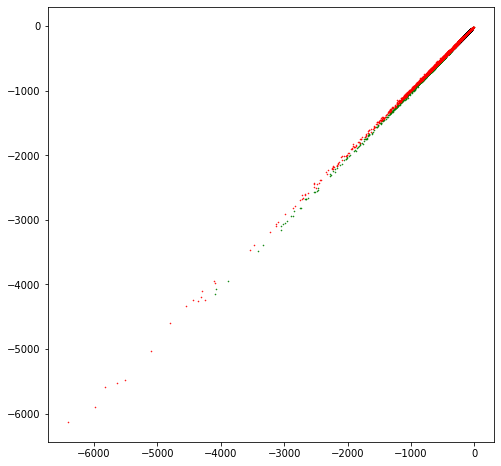

In [55]:
# Indices of jokes in train and test sets
train_good_idx, train_bad_idx, test_good_idx, test_bad_idx = TrainTestIdx(an_jokes, 0.75)

# Vocablary size
vocab = Vocablary(an_direct, train_good_idx, train_bad_idx)
V = len(vocab)

# Positive and negative word frequencies
good_freq, N_words_good = word_freq(an_direct, train_good_idx)
bad_freq, N_words_bad = word_freq(an_direct, train_bad_idx)


# Classification of train set jokes
accuracy = 0
Pgg, Pgb, = [], []
for i in train_good_idx:
    joke = an_direct[i]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += is_good_nb
    Pgg.append(P_good)  # Probability of good joke to be good according to naive bayes (NB)
    Pgb.append(P_bad)   # Probability of good joke to be bad according to NB
Pbg, Pbb = [], []
for i in train_bad_idx:
    joke = an_direct[i]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += 1 - is_good_nb
    Pbg.append(P_good)  # Probability of bad joke to be good according to NB
    Pbb.append(P_bad)  # Probability of bad jokes to be bad according to NB

accuracy /= len(train_good_idx) + len(train_bad_idx)
print("Train set accuracy: {:.3f}".format(accuracy))
    
# Visualization
fig = plt.figure(figsize = (8,8))
plt.scatter(Pgg, Pgb, c = 'green', s = 0.3)
plt.scatter(Pbg, Pbb, c = 'red', s = 0.3)

In [57]:
# Test set accuracy
accuracy = 0
LLg, LLb = {}, {}
for i in test_good_idx:
    joke = an_direct[i]
    is_good_nb, LLg[i], P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += is_good_nb
for i in test_bad_idx:
    joke = an_direct[i]
    is_good_nb, LLb[i], P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += 1 - is_good_nb
accuracy /= len(test_good_idx) + len(test_bad_idx)
print("Test set accuracy: {:.3f}".format(accuracy))

Test set accuracy: 0.619


## Bash quotes classification

Train set accuracy: 0.887


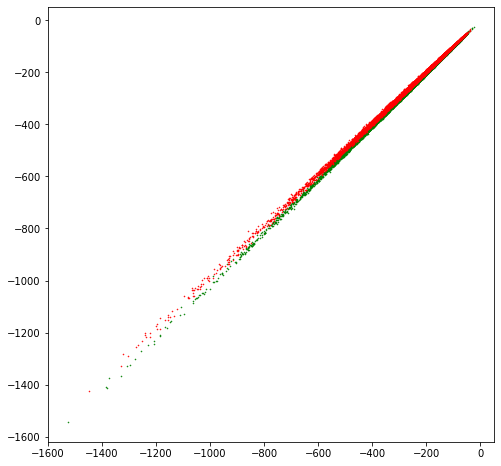

In [58]:
# Indices of jokes in train and test sets
train_good_idx, train_bad_idx, test_good_idx, test_bad_idx = TrainTestIdx(bash_jokes)

# Vocablary size
vocab = Vocablary(bash_direct, train_good_idx, train_bad_idx)
V = len(vocab)

# Positive and negative word frequencies
good_freq, N_words_good = word_freq(bash_direct, train_good_idx)
bad_freq, N_words_bad = word_freq(bash_direct, train_bad_idx)


# Classification of train set jokes
accuracy = 0
Pgg, Pgb = [], []
for i in train_good_idx:
    joke = bash_direct[i]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += is_good_nb
    Pgg.append(P_good)  # Probability of good joke to be good according to naive bayes (NB)
    Pgb.append(P_bad)   # Probability of good joke to be bad according to NB
Pbg, Pbb = [], []
for i in train_bad_idx:
    joke = bash_direct[i]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += 1 - is_good_nb
    Pbg.append(P_good)  # Probability of bad joke to be good according to NB
    Pbb.append(P_bad)   # Probability of bad jokes to be bad according to NB
accuracy /= len(train_good_idx) + len(train_bad_idx)
print("Train set accuracy: {:.3f}".format(accuracy))
    
# Visualization
fig = plt.figure(figsize = (8,8))
plt.scatter(Pgg, Pgb, c = 'green', s = 0.3)
plt.scatter(Pbg, Pbb, c = 'red', s = 0.3)

In [59]:
# Test set accuracy
accuracy = 0
for i in test_good_idx:
    joke = bash_direct[i]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += is_good_nb
for i in test_bad_idx:
    joke = bash_direct[i]
    is_good_nb, LL, P_good, P_bad = Classify(joke, good_freq, bad_freq, N_words_good, N_words_bad, V)
    accuracy += 1 - is_good_nb
accuracy /= len(test_good_idx) + len(test_bad_idx)
print("Test set accuracy: {:.3f}".format(accuracy))

Test set accuracy: 0.625


## Funny words rating

### Anecdotes

Good words

In [112]:
all_good_idx, all_bad_idx, _, _ = TrainTestIdx(an_jokes, 1.0)
vocab = Vocablary(an_direct, all_good_idx, all_bad_idx)
V = len(vocab)
good_freq, N_words_good = word_freq(an_direct, all_good_idx)
bad_freq, N_words_bad = word_freq(an_direct, all_bad_idx)

reg = 5

ff = []
for w in vocab:
    ng = good_freq.get(w, 0)
    nb = bad_freq.get(w, 0)
    ratio = (ng + reg) / (nb + reg)
    ff.append((w, ng, nb, ratio))
ff = pd.DataFrame(ff, columns = ['word', 'good count', 'bad count', 'ratio'])

ff = ff.sort_values(by = 'ratio', ascending = False).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,y,88,12,5.470588
1,вчеp,26,1,5.166667
2,почемy,25,2,4.285714
3,saloon,16,0,4.200000
4,suckme,16,0,4.200000
5,sultan,24,2,4.142857
6,veland88,28,3,4.125000
7,//vokrugsmeha.ru,23,2,4.000000
8,yже,18,1,3.833333
9,разговаpивать,13,0,3.600000


In [113]:
def ShowJokesWithWord(word, source = 'anec', n = 5, good = True):
    for i in range(n):
        if source == 'anec':
            print(an_jokes[an_inverted[word][int(good)][i]])
        if source == 'bash':
            print(bash_jokes[bash_inverted[word][int(good)][i]])


ShowJokesWithWord('у', 'anec', 5)

['У бабочки-однодневки начались пятисекундные...', '2000-06-05', 443, 1212, 775, 332, 1]
['У Геpасима новая собака! Водолаз...', '2004-03-15', 352, 722, 486, 134, 1]
['А у китайцев есть нецензурные иероглифы?', '2000-09-29', 556, 1126, 802, 246, 1]
['Пойду мужу улыбнусь, у него завтра зарплата!', '2012-03-23', 537, 763, 626, 89, 1]
['Две беды у России: Борисы и Абрамовичи.', '1999-11-16', 397, 1414, 841, 444, 1]


Bad words

In [99]:
ff = ff.sort_values(by = 'ratio', ascending = True).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,алик,1,124,0.046512
1,-да,2,54,0.118644
2,-а,7,96,0.118812
3,бутаев,3,56,0.131148
4,-почему,0,32,0.135135
5,-ты,0,29,0.147059
6,лукаш,3,47,0.153846
7,-что,1,31,0.166667
8,-ну,4,47,0.173077
9,-нуть,1,28,0.181818


In [114]:
ShowJokesWithWord('падруг', 'anec', 5, good = False)

['- Слышь, Пятровна, а куды делся телеканал  «Дождь»?\n- Да он, падруга, весь слился…', '2014-01-30', -121, 235, 57, 178, 0]
['- Как думаешь, Пятровна, почаму наши\nхвутбол просерили?\n-Да дриблинг, падруга, у них был дряблый!', '2014-07-03', -8, 12, 2, 10, 0]
['- Cлышь, Пятровна, што\nето у тябя за прибор такой?\n-Ето, падруга, глюкометр.\n-Так ты, што  на дурь подсела?', '2013-01-20', -5, 21, 8, 13, 0]
['-Слышь, Пятровна, вот\nраньше люди были\nпервобытные, а мы,\nвыходит – второбытные?\n-Да, падруга, второй сорт\nещё не брак!', '2013-06-16', -10, 16, 3, 13, 0]
['-Слышь,  Пятровна, вот пишуть –\nв Совейском Союзе сексу не было!\n-Ну это,  падруга, вруть! А, как жа\nБрежнявские пацалуи?', '2013-09-28', -17, 23, 3, 20, 0]


### Bash quotes

Good words

In [115]:
all_good_idx, all_bad_idx, _, _ = TrainTestIdx(bash_jokes, 1.0)
vocab = Vocablary(bash_direct, all_good_idx, all_bad_idx)
V = len(vocab)
good_freq, N_words_good = word_freq(bash_direct, all_good_idx)
bad_freq, N_words_bad = word_freq(bash_direct, all_bad_idx)

reg = 5

ff = []
for w in vocab:
    ng = good_freq.get(w, 0)
    nb = bad_freq.get(w, 0)
    ratio = (ng + reg) / (nb + reg)
    ff.append((w, ng, nb, ratio))
ff = pd.DataFrame(ff, columns = ['word', 'good count', 'bad count', 'ratio'])

ff = ff.sort_values(by = 'ratio', ascending = False).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,заебать,36,5,4.100000
1,кивать,19,1,4.000000
2,мамин,22,2,3.857143
3,учительница,28,4,3.666667
4,извиниться,17,1,3.666667
5,дпс,16,1,3.500000
6,командировка,33,6,3.454545
7,наклоняться,12,0,3.400000
8,стук,15,1,3.333333
9,бодро,11,0,3.200000


In [116]:
ShowJokesWithWord('ржач', 'bash', 5, good = True)

['<Verderben> как меня на ржач пробивало на инженерке при фразе "раствор циркуля"', '2006-05-29 14:04', 1148911440, 21045, 2757, 1]
['yyy: Максим. \nyyy: В постели должен стоять член! \nyyy: А у нас в постели стоит один только ржач!', '2010-12-09 08:11', 1291882260, 408881, 22868, 1]
['ear: Препод, дедок лет 70:\n- Четыре года замужем? И детей еще нет? Чего же вы, простите, резину тянете?\nИ дикий ржач со стороны его ровесников-преподов.', '2011-03-07 08:12', 1299485520, 409860, 20788, 1]
['Limbo: я сегодня читала башорг на работе и маскировала ржач за кашлем\nLimbo: в итоге мне сказали, что болезнь на ногах переносить нельзя, и отправили домой ', '2007-05-01 11:33', 1178019180, 196037, 5134, 1]
['gr33n> Поцоны\ngr33n> Не учите английский\ngr33n> Я недавно с ужасом осознал, что начал понимать, о чём говорят в порно\ngr33n> И теперь меня пробивает на ржач', '2012-08-10 09:45', 1344591900, 418355, 13096, 1]


Bad words

In [117]:
ff = ff.sort_values(by = 'ratio', ascending = True).reset_index(drop = True)
ff.head(20)

,word,good count,bad count,ratio
0,java,0,33,0.131579
1,релиз,0,24,0.172414
2,убунту,2,32,0.189189
3,генту,0,20,0.200000
4,софт,5,42,0.212766
5,to,8,51,0.232143
6,консоль,2,24,0.241379
7,код,33,151,0.243590
8,линукс,20,96,0.247525
9,исходник,2,23,0.250000


In [118]:
ShowJokesWithWord('генту', 'bash', 5, good = False)

['Новая поговорка от линуксоидов: Собрал Генту, да не ту.', '2012-01-30 09:46', 1327916760, 415356, 1642, 0]
['xxx: Имеется дохлый БП, паяльник и Генту\nxxx: Зимние каникулы будут весёлыми.', '2013-09-07 09:13', 1378545180, 424347, 1036, 0]
['<Serj> net-wireless/bluez required by world\n<Ion> блюз нужен миру!\n<Ion> я хренею с вашей генты.', '2009-04-23 08:45', 1240476300, 403222, 777, 0]
['<pinocchio> привет кто-нибудь устанавливал Linux Mandriva 2006?\n<Alexey> генту ролит\n<pinocchio> блин так и знал', '2006-01-30 10:30', 1138617000, 9572, 1515, 0]
['magenta: Когда домой?\ndel: 10-го\nmagenta: Собираешься? )\ndel: я ж не генту, сегодня только 3 число', '2010-07-05 08:45', 1278319500, 407210, 3498, 0]
